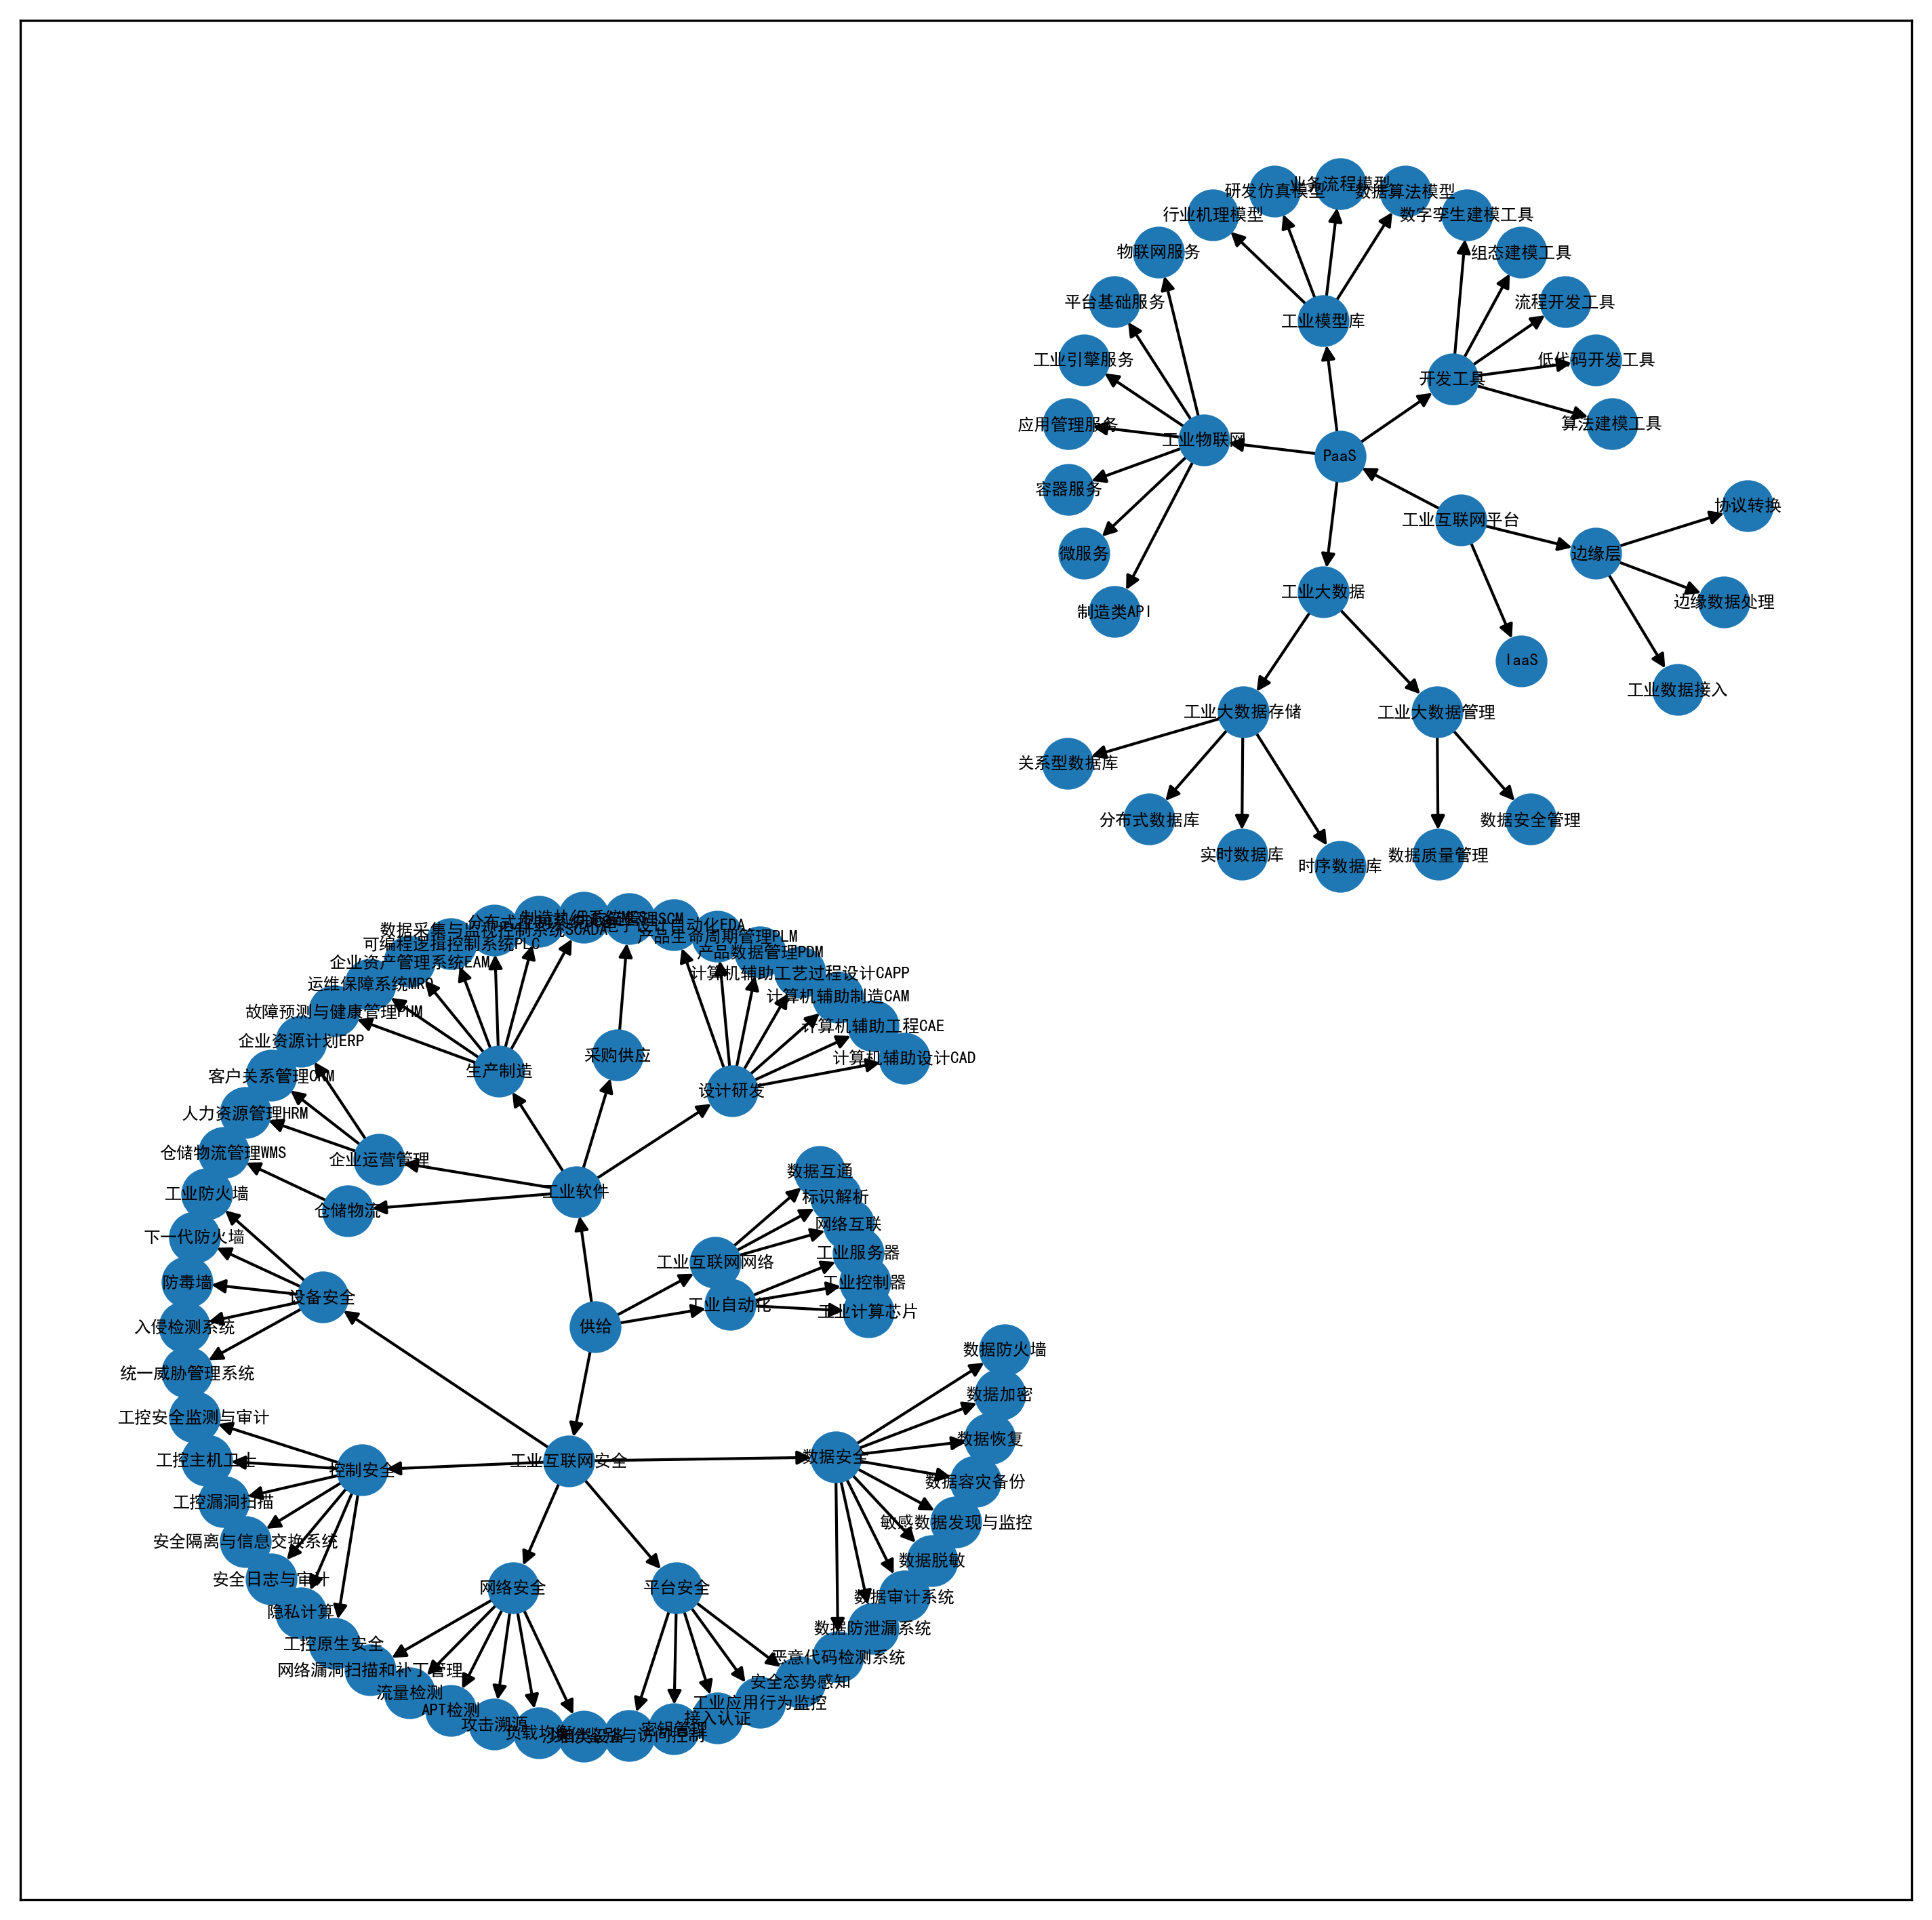

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'

BomNodes = pd.read_csv('BomNodes.csv', index_col=0)
BomNodes.set_index('Code', inplace=True)
BomCateNet = pd.read_csv('BomCateNet.csv', index_col=0)
BomCateNet.fillna(0, inplace=True)

G = nx.from_pandas_adjacency(BomCateNet, create_using=nx.MultiDiGraph())

labels_dict = {}
for code in G.nodes:
    labels_dict[code] = BomNodes.loc[code].to_dict()
nx.set_node_attributes(G, labels_dict)

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
node_labels = nx.get_node_attributes(G, 'Name')
plt.figure(figsize=(12, 12), dpi=300)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=6)
plt.show()
